In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from math import sqrt

In [2]:
df = pd.read_csv("D:/Excel/Crude-Oil_160101-221213.csv", index_col = "Date", parse_dates = True)
df.tail()
df.drop(df.columns[[0,1,2,4,5]], axis=1, inplace=True)
df

,Close
Date,
2016-01-04,36.76
2016-01-05,35.97
2016-01-06,33.97
2016-01-07,33.27
2016-01-08,33.16
...,...
2022-12-06,74.25
2022-12-07,72.01
2022-12-08,71.46


<AxesSubplot:xlabel='Date'>

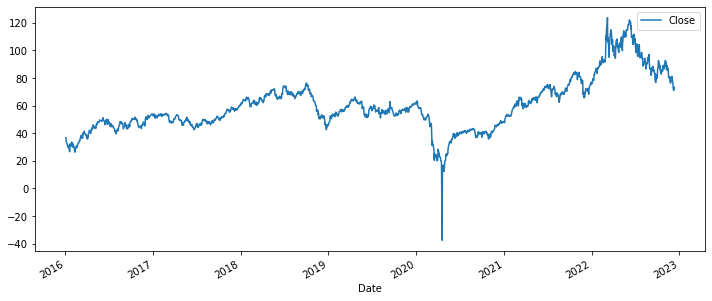

In [3]:
df.plot(y = 'Close', figsize = (12,5))

In [4]:
def ad_test(dataset):
    result = adfuller(dataset, autolag = 'AIC')
    print("1. ADF Statistic:" , result[0])
    print("2. p-value : ", result[1])
    print("3. Lags : ", result[2])
    print("4. Critical values :" , result[3])
    for key, val in result[4].items():
        print("\t", key ," ", val)
ad_test(df['Close'])

1. ADF Statistic: -1.9578315343434511
2. p-value :  0.3053628860646654
3. Lags :  3
4. Critical values : 1745
	 1%   -3.434102977404239
	 5%   -2.8631977303784235
	 10%   -2.5676525270728483


In [5]:
stepwise_fit = auto_arima(df["Close"],trace = True, suppress_warnings= True, seasonal = True, m = 7)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=7901.266, Time=2.24 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=8023.213, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=7922.498, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=7903.179, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=8021.345, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=7903.268, Time=1.54 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=7903.251, Time=1.46 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=7902.760, Time=3.70 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=7902.774, Time=3.59 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=7901.505, Time=1.10 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=7903.065, Time=2.57 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=7902.925, Time=2.13 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=7904.615, Time=4.11 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=7899.425, Time=1.84 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1749
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -3942.990
Date:                           Mon, 02 Jan 2023   AIC                           7895.980
Time:                                   17:29:11   BIC                           7923.311
Sample:                                        0   HQIC                          7906.084
                                          - 1749                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1959      0.029      6.748      0.000       0.139       0.253
ma.L1         -0.4708      0.028    -16.519      0.000      -0.527      -0.415
ar.S.L7       -0.8825      0.128     -6.875      0.000      -1.134      -0.631
ma.S.L7        0.8590      0.137      6.267      0.000       0.590       1.128
sigma2         5.3306      0.019    277.048      0.000       5.293       5.368
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3704727.07
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               5.08   Skew:                            -7.05
Prob(H) (two-sided):                  0.00   Kurtosis:                       228.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
def split_data(data, test_split):
    length = len(data)
    size = round(length * (1 - test_split))
    train, test = data[:size], data[size:]
    print('train:', len(train))
    print('test:', len(test))
    return train, test

In [7]:
test_split = 0.2
train, test = split_data(df, test_split)

train: 1399
test: 350


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
model = sm.tsa.SARIMAX(train['Close'], order = (1,1,1), seasonal_order = (1,0,1,7))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 1399
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -3052.807
Date:                           Mon, 02 Jan 2023   AIC                           6115.613
Time:                                   17:29:12   BIC                           6141.827
Sample:                                        0   HQIC                          6125.413
                                          - 1399                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0649      0.016      4.071      0.000       0.034       0.096
ma.L1         -0.4635      0.016    -28.794      0.000      -0.495      -0.432
ar.S.L7        0.4839      0.763      0.634      0.526      -1.012       1.980
ma.S.L7       -0.4573      0.767     -0.596      0.551      -1.960       1.046
sigma2         4.6152      0.016    296.808      0.000       4.585       4.646
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           7583873.12
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               9.21   Skew:                           -12.04
Prob(H) (two-sided):                  0.00   Kurtosis:                       363.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start = start, end = end, typ = 'levels')

print(pred)
pred.index = df.index[start: end + 1]

1399    71.509715
1400    71.557190
1401    71.636809
1402    71.703705
1403    71.682246
          ...    
1744    71.634515
1745    71.634515
1746    71.634515
1747    71.634515
1748    71.634515
Name: predicted_mean, Length: 350, dtype: float64


<AxesSubplot:xlabel='Date'>

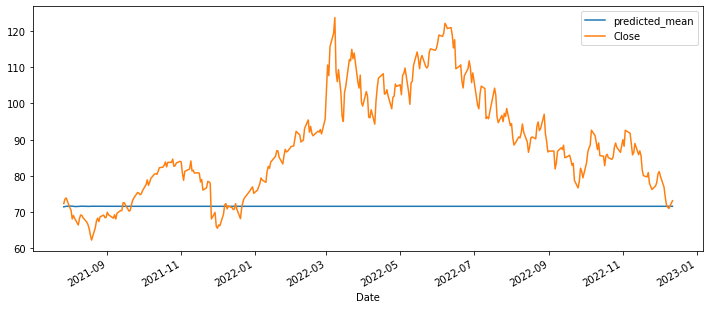

In [11]:
plt.figure(figsize = (12,5))
pred.plot(legend = True)
test['Close'].plot(legend= True)

In [12]:
test['Close'].mean()

88.58657142857138

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

mse =  mean_squared_error(pred, test["Close"])
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(pred, test["Close"])
r2 = r2_score(pred, test['Close'])
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  22.239178300829145
MAPE:  24.835940000144845


In [17]:
future_days = pd.date_range(start = "07/26/2021", end = "01/11/2023")
pred = model.predict(start = len(df), end = len(df) + 534, typ = " levels").rename("Sarima prediction")
pred.index = future_days

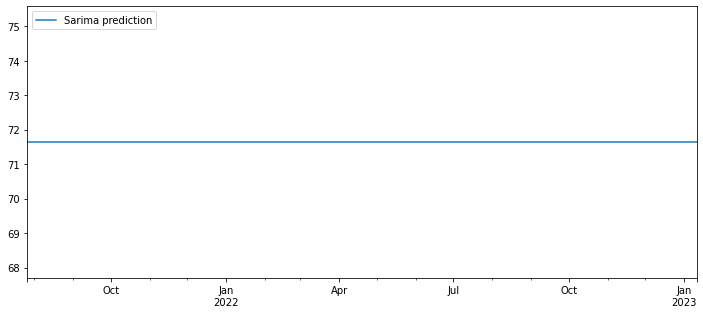

In [18]:
pred.plot(figsize = (12,5))
plt.legend(loc = 'upper left')

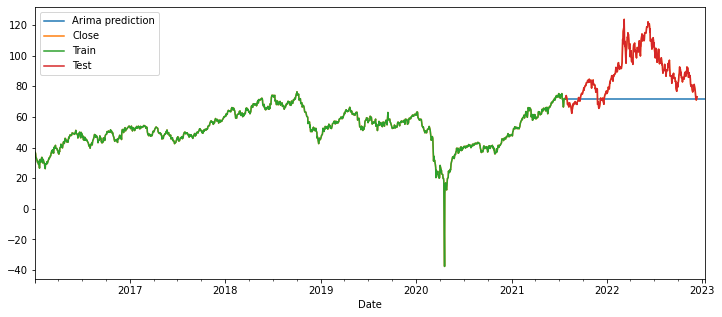

In [16]:
plt.figure(figsize = (12,5))
pred.plot()
df['Close'].plot()
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')
plt.show()